In [26]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#loading the data
df=pd.read_csv("Phishing Data - Phishing Data.csv")

In [3]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


In [4]:
df.shape

(2456, 31)

In [5]:
df.Result.value_counts()

0    1362
1    1094
Name: Result, dtype: int64

The data is balanced as there is not much difference.

In [6]:
#getting all values in column Result
result=df.Result

In [7]:
result.shape

(2456,)

In [8]:
#dropping the column Result
df=df.drop(['Result'],axis=1)
df.shape

(2456, 30)

In [9]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,0,-1,1,-1,-1,0,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,0,-1,1,0,-1,0,1,0
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,0,1,1,-1,0,0,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,0,-1,1,1,-1,0,-1,0
4,0,0,1,0,0,-1,1,1,0,0,...,0,1,0,-1,1,0,-1,0,1,0


In [10]:
#splitting the data train(70%) and test(30%)
x_1, x_test, y_1, y_test = train_test_split(df, result, test_size=0.3, random_state=0,shuffle=False)

# KNN

In [27]:
#getting the optimal hyperparameter doing 5 fold cross validation
knn = KNeighborsClassifier(algorithm='kd_tree')
param_grid = {'n_neighbors':np.arange(1,40,2)} 
gsv = GridSearchCV(knn,param_grid,cv=5)
gsv.fit(x_1,y_1)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))
print("best estimator: ",gsv.estimator)

Best HyperParameter:  {'n_neighbors': 1}
Best Accuracy: 96.10%
best estimator:  KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


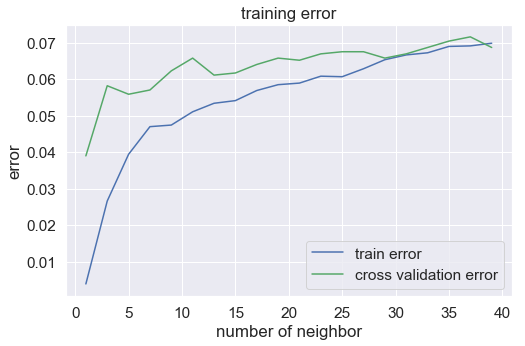

In [28]:
#plotting of hyperparameter and training error
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,40,2),1-gsv.cv_results_['mean_train_score'],"b",label="train error")
plt.plot(np.arange(1,40,2),1-gsv.cv_results_['mean_test_score'],"g",label="cross validation error")
plt.legend()
plt.xlabel("number of neighbor")
plt.ylabel("error")
plt.title("training error")
plt.show()

the accuracy is 93.08%
the precision is 92.33%
the recall is 92.60%
the f1 is 92.47%


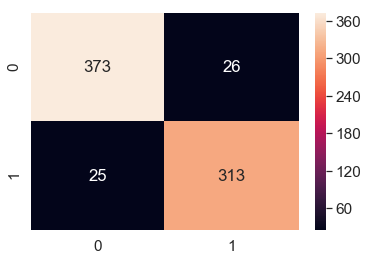

In [29]:
#applying the model with best hyperparameter
gsv.estimator.fit(x_1,y_1)
pred=gsv.estimator.predict(x_test)
#accuracy
acc=accuracy_score(y_test,pred)*100
print("the accuracy is %.2f%%"%acc)
#precision
pre=precision_score(y_test,pred)*100
print("the precision is %.2f%%"%pre)
#recall
rec=recall_score(y_test,pred)*100
print("the recall is %.2f%%"%rec)
#f1
f=f1_score(y_test,pred)*100
print("the f1 is %.2f%%"%f)
#confusion matrix
df_cm=pd.DataFrame(confusion_matrix(y_test,pred))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,fmt="d")

# Logistic Regression

In [32]:
#5 fold cross validation to get best hyperparameter
lr = LogisticRegression()
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10,100],"penalty":["l1","l2"]}     
gsv = GridSearchCV(lr,param_grid,cv=5,n_jobs=-1,verbose=1,scoring="f1")
gsv.fit(x_1,y_1)
print("Best HyperParameter: ",gsv.best_params_)
#assinging best alpha to optimal print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))
print("best estimator: ",gsv.estimator)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  55 out of  70 | elapsed:    4.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    5.0s finished


Best HyperParameter:  {'C': 1, 'penalty': 'l1'}
best estimator:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [33]:
#separating the regularization values
mean_test_score=gsv.cv_results_["mean_test_score"]
mean_test_score=1-mean_test_score
y_l1=[]
y_l2=[]
for i in mean_test_score[0:14:2]:
    y_l1.append(i)
for i in mean_test_score[1:14:2]:
    y_l2.append(i)
print(y_l1)
print("\n\n")
print(y_l2)

[1.0, 1.0, 0.11119030221850734, 0.07033408870347668, 0.06919650521742327, 0.07039935090508365, 0.07091674479830257]



[0.1004831337598765, 0.0927584755091273, 0.07571464969186903, 0.06953378015392886, 0.07298301459194334, 0.07172409070890706, 0.07091940378115735]


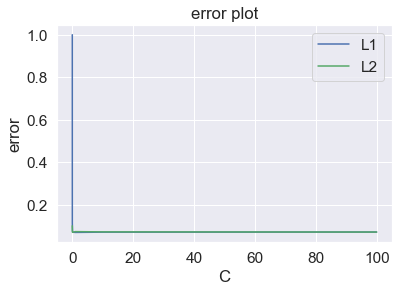

In [34]:
#plotting the error
x=param_grid["C"]
plt.plot(x,y_l1,"b",label="L1")
plt.plot(x,y_l2,"g",label="L2")
plt.xlabel("C")
plt.ylabel("error")
plt.title("error plot")
plt.legend()
plt.show()



the accuracy is 93.22%

the recall is 91.12%
the precision is 93.90%
the f1 score is 92.49%


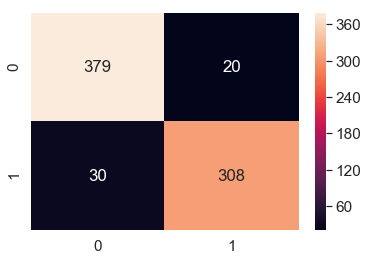

In [35]:
#applying the model with best hyperparameter
gsv.estimator.fit(x_1,y_1)
pred=gsv.estimator.predict(x_test)
#different metrics
acc=accuracy_score(y_test,pred)*100
print("\nthe accuracy is %.2f%%"%acc)
 #recall   
re=recall_score(y_test,pred,) * 100
print("\nthe recall is %.2f%%"%re)
#precision
pre=precision_score(y_test,pred) * 100
print("the precision is %.2f%%"%pre)
#f1
f1=f1_score(y_test,pred) * 100
print("the f1 score is %.2f%%"%f1)
#confusion matrix
df_cm=pd.DataFrame(confusion_matrix(y_test,pred))
#sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,fmt="d")

# SVM

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best HyperParameter:  {'alpha': 0.01}
best estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.1s finished


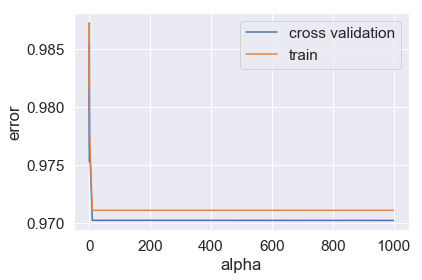

In [30]:
#5 fold cross validation to get best hyperparameter
sgd = SGDClassifier(loss="hinge",learning_rate='optimal')
param_grid = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]} 

gsv = GridSearchCV(sgd,param_grid,cv=5,n_jobs=-1,verbose=1,scoring="roc_auc")
gsv.fit(x_1,y_1)
print("Best HyperParameter: ",gsv.best_params_)
#assinging best alpha to optimal print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))
print("best estimator: ",gsv.estimator)
#print("cv results :",gsv.cv_results_)

#plotting the error
yy1=list(gsv.cv_results_['mean_test_score'])
yy2=list(gsv.cv_results_['mean_train_score'])
xx=[0.0001,0.001,0.01,0.1,1,10,100,1000]
plt.plot(xx,yy1,label='cross validation')
plt.plot(xx,yy2,label='train')
plt.xlabel("alpha")
plt.ylabel("error")
plt.legend()
plt.show()


the accuracy is 93.62%

the recall is 90.53%
the precision is 95.33%
the f1 score is 92.87%


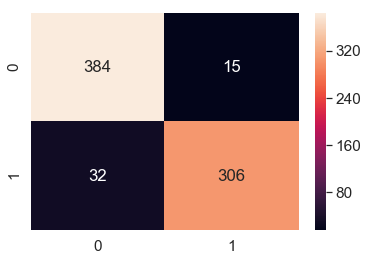

In [31]:
#applying the model using best hyperparameter
oo=gsv.best_params_['alpha']
    
sgd=SGDClassifier(alpha=oo)
sgd.fit(x_1,y_1)
pred=sgd.predict(x_test)
#different metrics
acc=accuracy_score(y_test,pred)*100
print("\nthe accuracy is %.2f%%"%acc)
#recall
re=recall_score(y_test,pred,) * 100
print("\nthe recall is %.2f%%"%re)
#precision
pre=precision_score(y_test,pred) * 100
print("the precision is %.2f%%"%pre)
#f1
f1=f1_score(y_test,pred) * 100
print("the f1 score is %.2f%%"%f1)
#confusion matrix
df_cm=pd.DataFrame(confusion_matrix(y_test,pred))
#sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,fmt="d")

# Random forest

In [36]:
#cross validation to get best hyperparameter
rf = RandomForestClassifier()
n_estimators=[10,50,60,80,100,125,150]
max_depth=[5,7,9,11,13,15,17]
param_grid = {'n_estimators':n_estimators,'max_depth':max_depth} 
gsv = GridSearchCV(rf,param_grid,cv=5,n_jobs=-1,verbose=1,scoring="roc_auc")
gsv.fit(x_1,y_1)
print("Best HyperParameter: ",gsv.best_params_)
#assinging best alpha to optimal print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))
print("best estimator: ",gsv.estimator)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:   19.4s finished


Best HyperParameter:  {'max_depth': 15, 'n_estimators': 125}
best estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


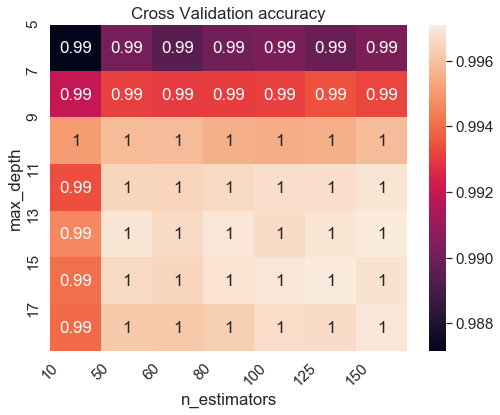

In [37]:
plt.figure(figsize=(8, 6))
scores = gsv.cv_results_['mean_test_score'].reshape(len(n_estimators),len(max_depth))
testing = sns.heatmap(scores, annot=True)

plt.xlabel('n_estimators')
plt.ylabel('max_depth')

plt.xticks(np.arange(len(n_estimators)), n_estimators, rotation=45)
plt.yticks(np.arange(len(max_depth)), max_depth)
plt.title('Cross Validation accuracy')
plt.show()


the accuracy is 96.47%

the recall is 95.27%
the precision is 96.99%
the f1 score is 96.12%


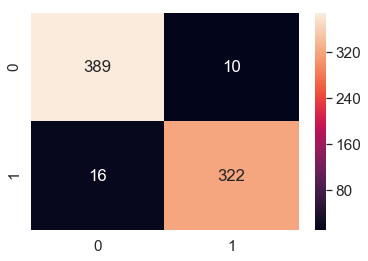

In [39]:
#applying model using best hyperparameter
es=gsv.best_params_['n_estimators']
md=gsv.best_params_['max_depth']
    
rf=RandomForestClassifier(n_estimators=es,max_depth=md)
rf.fit(x_1,y_1)
pred=rf.predict(x_test)
#different metrics
acc=accuracy_score(y_test,pred)*100
print("\nthe accuracy is %.2f%%"%acc)

re=recall_score(y_test,pred,) * 100
print("\nthe recall is %.2f%%"%re)

pre=precision_score(y_test,pred) * 100
print("the precision is %.2f%%"%pre)

f1=f1_score(y_test,pred) * 100
print("the f1 score is %.2f%%"%f1)

df_cm=pd.DataFrame(confusion_matrix(y_test,pred))
#sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True,fmt="d")

# Conclusion

In [40]:
from prettytable import PrettyTable

In [41]:
con=PrettyTable()
con.field_names=['model','accuracy','precision','recall','f1']
con.add_row(['KNN','93.08 %','92.33 %','92.60 %','92.47 %'])
con.add_row(['Logistic regression','93.22 %','91.12 %','93.90 %','92.49 %'])
con.add_row(['SVM','93.62 %','90.53 %','95.33 %','92.87%'])
con.add_row(['Random forest','96.47 %','95.27 %','96.99 %','96.12 %'])

In [42]:
print(con)

+---------------------+----------+-----------+---------+---------+
|        model        | accuracy | precision |  recall |    f1   |
+---------------------+----------+-----------+---------+---------+
|         KNN         | 93.08 %  |  92.33 %  | 92.60 % | 92.47 % |
| Logistic regression | 93.22 %  |  91.12 %  | 93.90 % | 92.49 % |
|         SVM         | 93.62 %  |  90.53 %  | 95.33 % |  92.87% |
|    Random forest    | 96.47 %  |  95.27 %  | 96.99 % | 96.12 % |
+---------------------+----------+-----------+---------+---------+


Random forest classifies the website better than the other 3 models.